# Курс Специализация Data Science Дипломный проект. Бриф учебного кейса
## «Модель прогнозирования стоимости жилья для агентства недвижимости»

### 2 Этап Анализ данных

In [ ]:
pip install category_encoders

In [ ]:
# Загрузка библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objs as go
import scipy as sp
import scipy.optimize as spo
from scipy import stats
import statsmodels.api as sm
from itertools import chain
from scipy.stats import shapiro
from scipy.stats import anderson
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
import category_encoders as ce

from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [ ]:
# Функция для визуализации распределения числовых признаков

def visualize_distributions(titles_values_dict):
  columns = min(3, len(titles_values_dict))
  rows = (len(titles_values_dict) - 1) // columns + 1
  fig = plt.figure(figsize = (columns * 6, rows * 4))
  for i, (title, values) in enumerate(titles_values_dict.items()):
    hist, bins = np.histogram(values, bins = 20)
    ax = fig.add_subplot(rows, columns, i + 1)
    ax.bar(bins[:-1], hist, width = (bins[1] - bins[0]) * 0.7)
    ax.set_title(title)
  plt.show()

In [ ]:
# Функция для оценки распределения категориальных признаков в зависимости от целевой переменной
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (12, 6))
    sns.boxplot(x=column, y='target',
                data=df.loc[df.loc[:, column].isin(df.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

## Описание данных:
* 'status' — статус продажи;
* 'street' — адрес объекта;
* 'baths' — количество ванных комнат;
* 'city' — город;
* 'sqft' — площадь в футах;
* 'zipcode' — почтовый индекс;
* 'state' — штат;
* target' — цена объекта недвижимости (целевой признак, который
необходимо спрогнозировать).
* 'pool_encoded' — наличие собственного бассейна;
* 'Type' — тип объекта недвижимости;
* 'Year built' - год постройки;
* 'Heating_encoded' - наличие отопления;
* 'Cooling_encoded' - наличие кондиционера;
* 'Parking_encoded' - наличие парковки/гаража;
* 'fireplace_encoded' - наличие камина;
* 'school_rating _mean' - средний рейтинг школ рядом;
* 'school_dist_min' - Минимальное растояние до школы;


# Подгрузим предобработанный датасет (из первого этапа)

In [ ]:
df = pd.read_csv('/content/cleaned_data.csv')
display(df.head())
df.info()

,status,street,baths,city,sqft,zipcode,state,target,pool_encoded,Type,Year built,Heating_encoded,Cooling_encoded,Parking_encoded,fireplace_encoded,school_rating _mean,school_dist_min
0,Active,240 Heather Ln,4.0,Southern Pines,2900,28387,NC,418000,False,single_family_home,2019,True,False,False,True,5.2,2.70
1,For Sale,12911 E Heroy Ave,3.0,Spokane Valley,1947,99216,WA,310000,False,single_family_home,2019,False,False,False,False,4.0,1.01
2,For Sale,2005 Westridge Rd,2.0,Los Angeles,3000,90049,CA,2895000,True,single_family_home,1961,True,True,True,True,6.7,1.19
3,For Sale,4311 Livingston Ave,8.0,Dallas,6457,75205,TX,2395000,False,single_family_home,2006,True,True,True,True,5.6,0.10
4,For Sale,1624 S Newkirk St,0.0,Philadelphia,897,19145,PA,209000,False,townhouse,1920,True,True,False,False,-1.0,-1.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331844 entries, 0 to 331843
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   status               331844 non-null  object 
 1   street               331844 non-null  object 
 2   baths                331844 non-null  float64
 3   city                 331844 non-null  object 
 4   sqft                 331844 non-null  int64  
 5   zipcode              331844 non-null  int64  
 6   state                331844 non-null  object 
 7   target               331844 non-null  int64  
 8   pool_encoded         331844 non-null  bool   
 9   Type                 331844 non-null  object 
 10  Year built           331844 non-null  object 
 11  Heating_encoded      331844 non-null  bool   
 12  Cooling_encoded      331844 non-null  bool   
 13  Parking_encoded      331844 non-null  bool   
 14  fireplace_encoded    331844 non-null  bool   
 15  school_rating _me

Признак zipcode должен указывать на район расположения объекта, следовательно должен быть строковым, исправим это. Проверим данные на выбросы.

In [ ]:
df['zipcode'] = df['zipcode'].astype(str)

In [ ]:
# Составим список булевых признаков:
bin_features = ['pool_encoded','Heating_encoded','Cooling_encoded','Parking_encoded','fireplace_encoded']

# Составим список категориальных признаков:
cat_features = ['status','city','zipcode','state','Type','Year built']

# Составим список числовых признаков:
num_features = ['baths', 'sqft', 'target', 'school_rating _mean', 'school_dist_min']

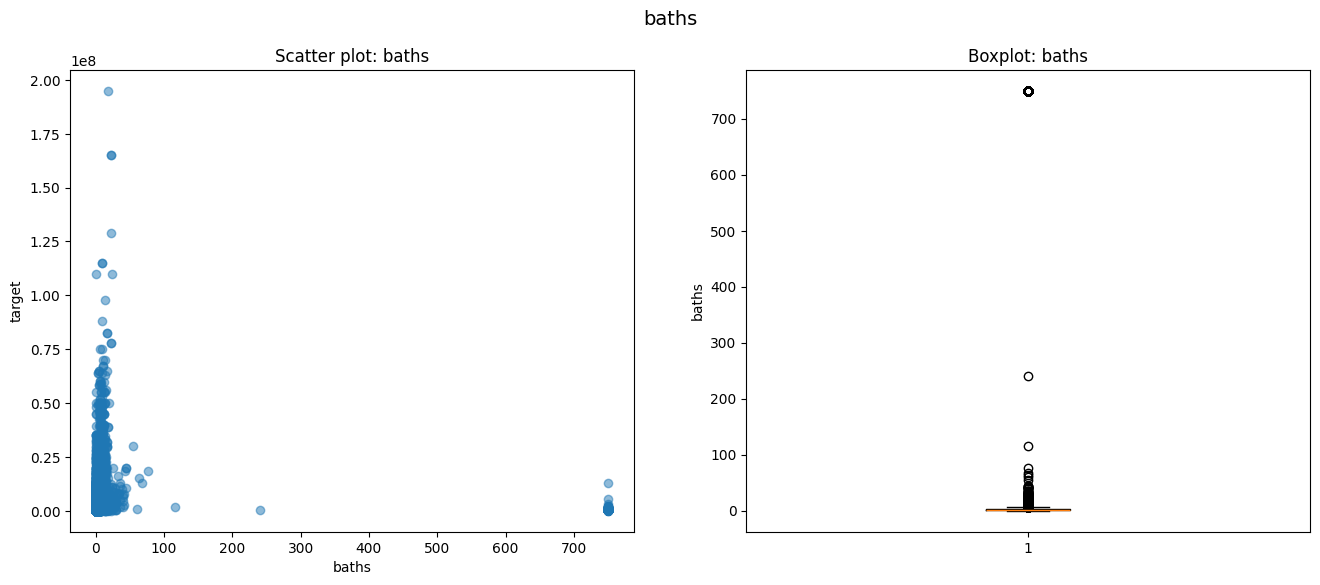

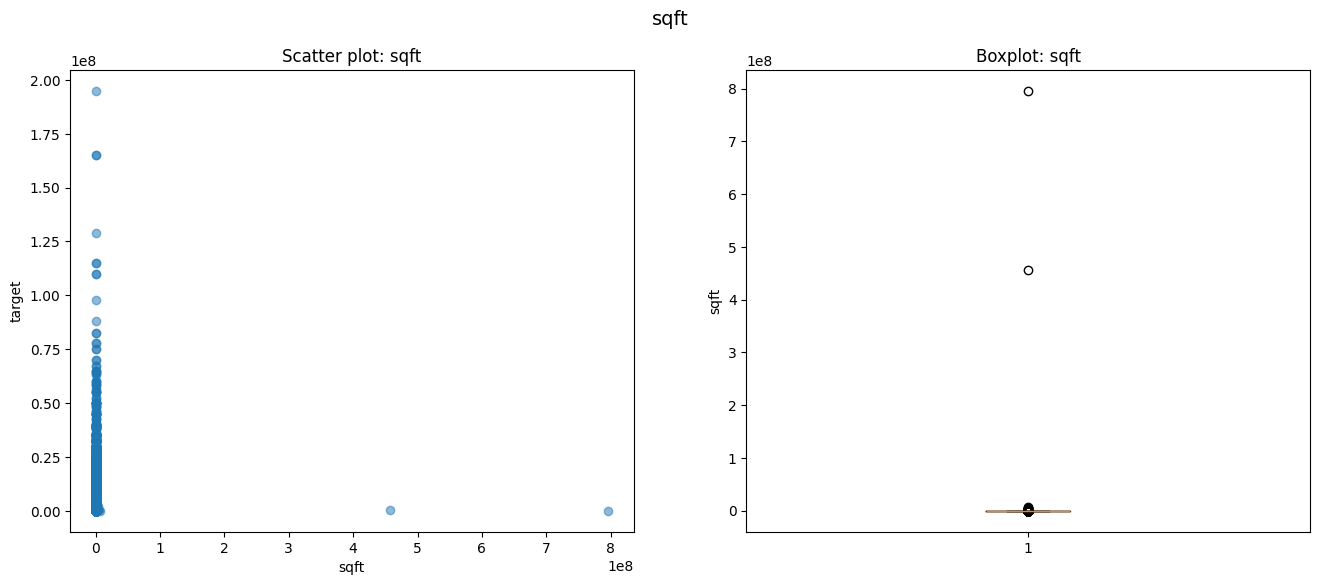

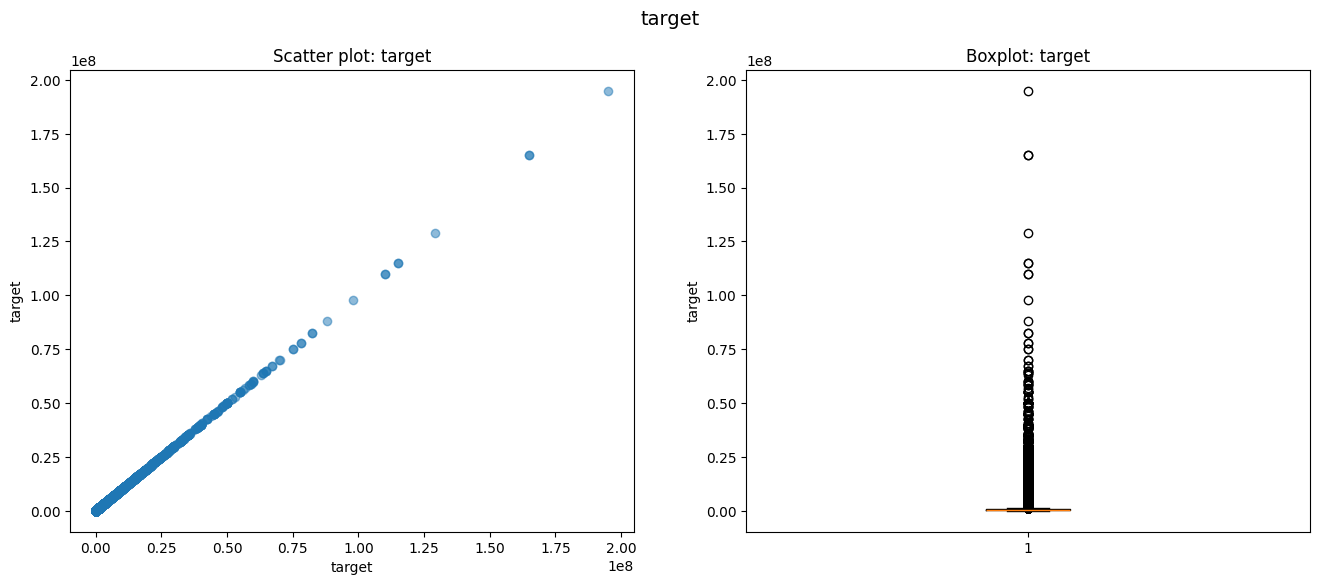

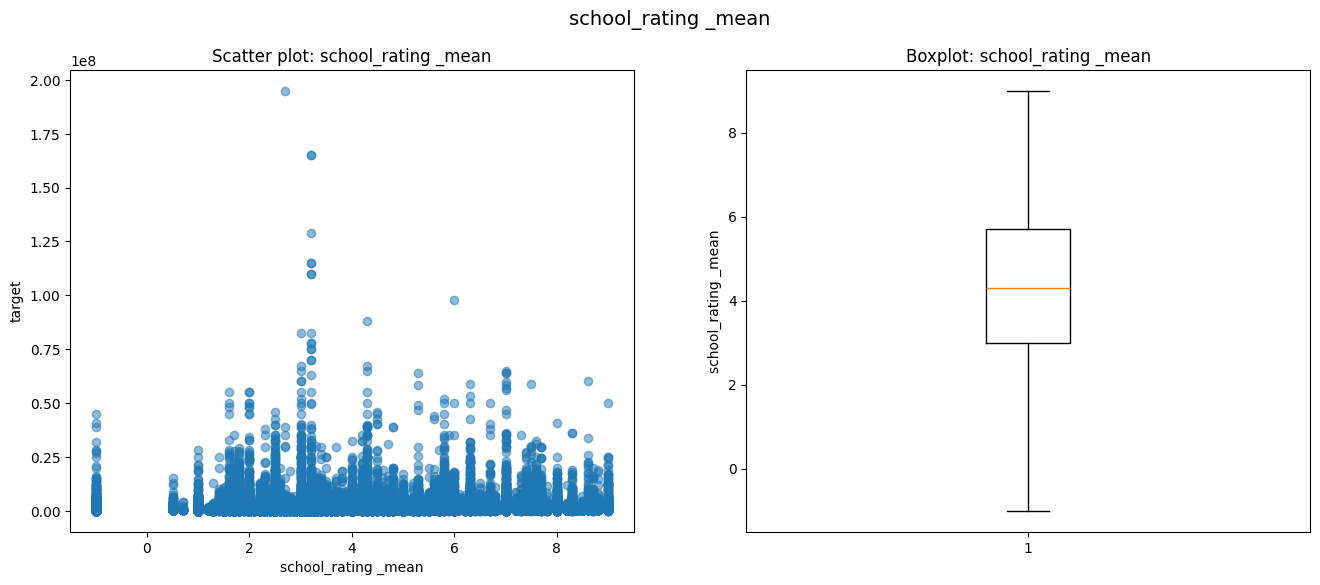

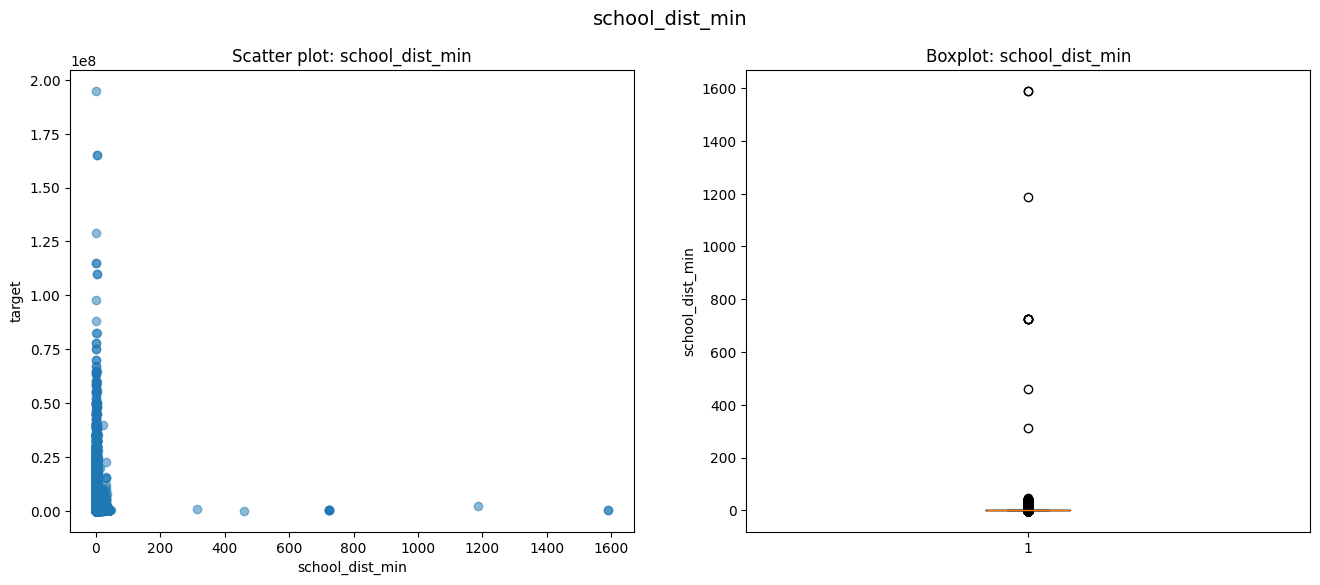

In [ ]:
# Создание графика рассеивания и ящика с усами для каждого признака
for feature in num_features:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle(f'{feature}', fontsize=14)

    # График рассеивания
    ax1.scatter(df[feature], df['target'], alpha=0.5)
    ax1.set_title(f'Scatter plot: {feature}')
    ax1.set_xlabel(feature)
    ax1.set_ylabel('target')

    # Ящик с усами
    ax2.boxplot(df[feature])
    ax2.set_title(f'Boxplot: {feature}')
    ax2.set_ylabel(feature)

    plt.show()

* По ванным комнатам нужно посмотреть 116, 241 и 750 ванных комнат, слижком низкая цена при таком колличестве,
* По площади нужно посмотреть значения 0 и цена 195 милионов а так же площади больше 456
* По растоянию до школы, растояния более 300

In [ ]:
# выведем интересующие нас строки
condition = (df['baths'].isin([116,241,750]))
filtered_df = df[condition]
# Вывести отфильтрованные строки
display(filtered_df.head(5))
# Подсчет среднего значения 'sqft'
average_sqft = filtered_df['sqft'].mean()
# Вывести среднее значение 'sqft'
print("Среднее значение sqft: ", average_sqft)

,status,street,baths,city,sqft,zipcode,state,target,pool_encoded,Type,Year built,Heating_encoded,Cooling_encoded,Parking_encoded,fireplace_encoded,school_rating _mean,school_dist_min
981,Active,3624 Douglas Ave,750.0,Dallas,1758,75219,TX,499000,False,other,1993,False,True,False,True,2.6,0.9
1788,Active,920 I St NW #411,750.0,Washington,1367,20001,DC,1499000,False,other,2013,False,False,False,False,6.8,0.3
3157,Active,601 W 11th Ave #409,750.0,Denver,873,80204,CO,348900,False,other,1981,True,True,False,False,4.0,0.2
6664,Active,1260 Xavier St,750.0,Denver,1864,80204,CO,560000,False,other,1936,True,False,False,False,2.0,0.5
6784,Active,3314 Douglas Ave Unit 202D,750.0,Dallas,1336,75219,TX,285000,False,condo,1984,False,True,False,True,2.0,1.0


Среднее значение sqft:  2101.8870292887027


Вывод (по ванным комнатам): таких квартир нет с 750 ванными, т.с. удалим эти выбросы

In [ ]:
# Удаляем Выбросы, соответствующие условию
df.drop(df[condition].index, inplace=True)

In [ ]:
condition1 = ((df['sqft'] == 0) & (df['target'] == 195000000)) | (df['sqft'] > 455000000)
filtered1_df = df[condition1]
# Вывести отфильтрованные строки
display(filtered1_df)

,status,street,baths,city,sqft,zipcode,state,target,pool_encoded,Type,Year built,Heating_encoded,Cooling_encoded,Parking_encoded,fireplace_encoded,school_rating _mean,school_dist_min
55327,For Sale,1723 Pulte St,2.0,Cincinnati,795979430,45225,OH,27500,False,single_family_home,1901,True,True,True,True,2.5,0.78
116537,For Sale,875 Nimes Rd,18.0,Los Angeles,0,90077,CA,195000000,True,single_family_home,1935,True,True,True,True,2.7,1.30
331276,Active,5382 S Dixie Hwy,0.0,Glendale,456602479,42740,KY,198000,False,multi_family_home,2012,True,True,False,False,6.3,3.10


Вывод (по площади и ценовому сегменту), также таких квартир не существует удалим их.

In [ ]:
# Удаляем Выбросы, соответствующие условию
df.drop(df[condition1].index, inplace=True)

In [ ]:
condition2 = (df['school_dist_min']> 300)
filtered2_df = df[condition2]
# Вывести отфильтрованные строки
print(len(filtered2_df))
display(filtered2_df.head(15))

10


,status,street,baths,city,sqft,zipcode,state,target,pool_encoded,Type,Year built,Heating_encoded,Cooling_encoded,Parking_encoded,fireplace_encoded,school_rating _mean,school_dist_min
23354,Other,73 Park Rd,4.0,Falcon Heights,6000,78545,TX,670000,False,single_family_home,1980,True,True,True,False,2.5,312.40
96926,For Sale,108 N Nbelvedere Blvd #29,0.0,Santa Ana,890,92703,TN,48640,False,single_family_home,1963,True,True,False,True,2.7,1590.36
149215,For Sale,253 W Wnorwood Ave,0.0,Spring,720,77380,TN,18000,False,single_family_home,1950,True,False,False,True,7.5,460.86
179635,For Sale,5600 Pine Tree Dr,6.0,Miami Beach,4173,33140,FL,2350000,True,single_family_home,1949,True,False,True,False,5.5,1187.14
190201,For Sale,2318 E Ewarren St,3.0,Needmore,1230,17238,TN,57225,False,single_family_home,1953,True,True,False,True,5.5,725.17
203865,For Sale,2338 E Ewarren St,3.0,Needmore,1230,17238,TN,57225,False,single_family_home,1950,True,True,False,True,5.5,725.21
264457,For Sale,2315 E Ewarren St,3.0,Needmore,1230,17238,TN,57225,False,single_family_home,1950,True,True,False,True,5.5,725.20
313885,For Sale,108 N Nbelvedere Blvd #12,0.0,Santa Ana,890,92703,TN,48300,True,single_family_home,1963,True,True,False,True,2.7,1590.38
314391,For Sale,2332 E Ewarren St,3.0,Needmore,1230,17238,TN,57225,False,single_family_home,1953,True,True,True,True,5.5,725.19
327171,For Sale,2309 E Ewarren St,3.0,Needmore,1230,17238,TN,57225,False,single_family_home,1950,True,True,False,True,5.5,725.19


In [ ]:
# Удаляем Выбросы, соответствующие условию
df.drop(df[condition2].index, inplace=True)

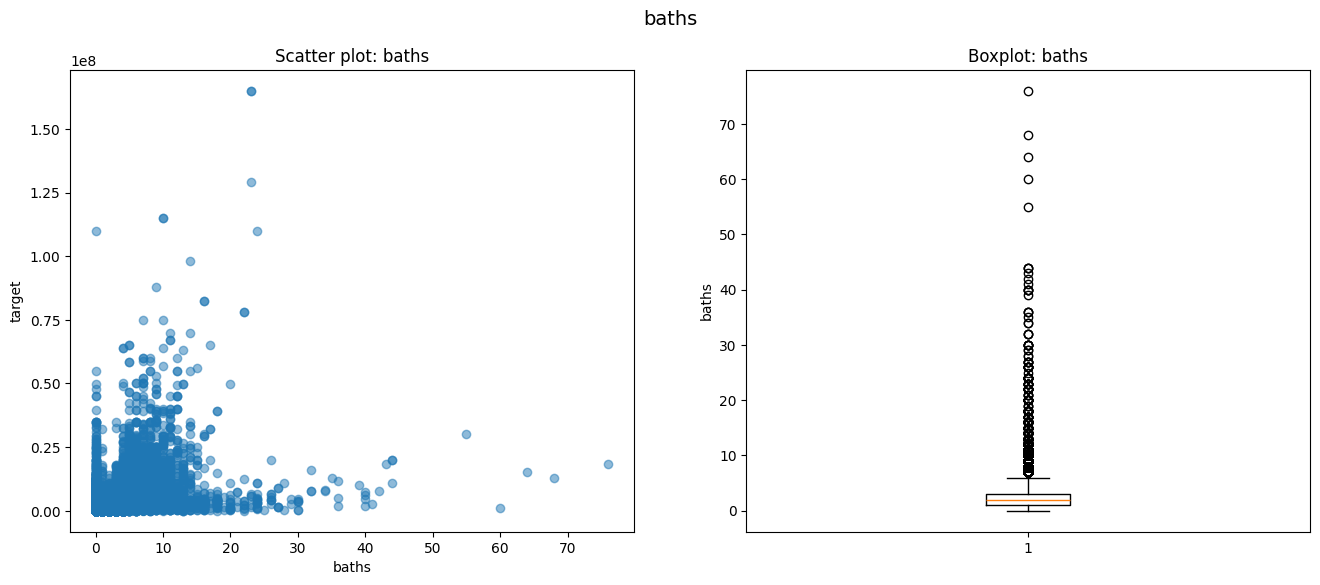

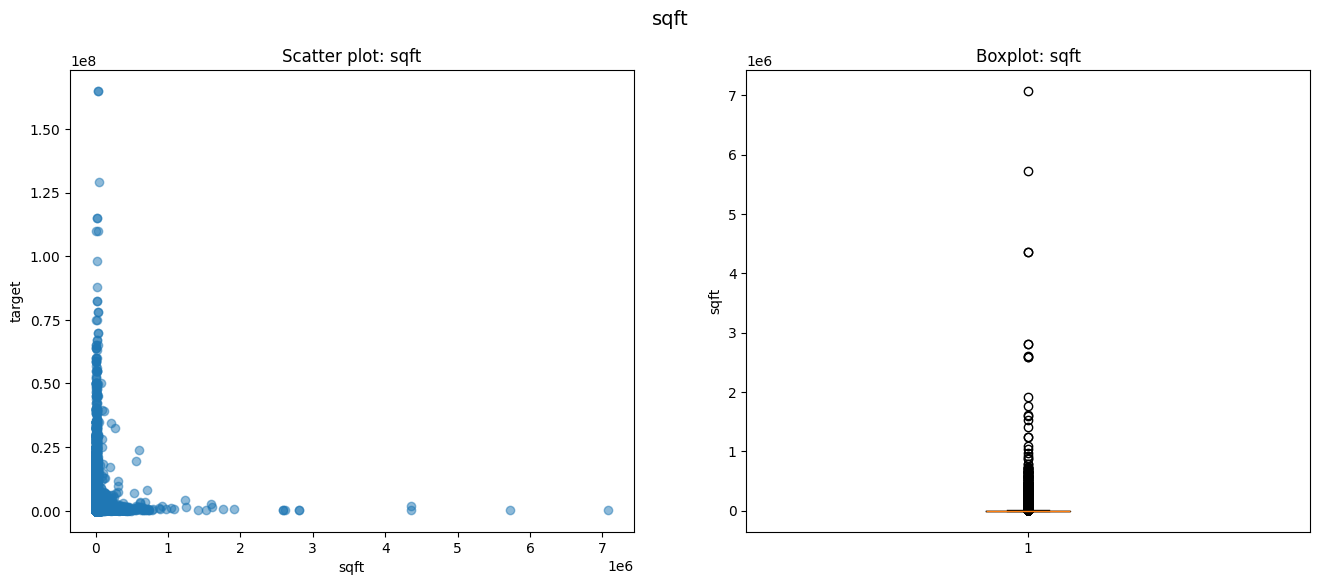

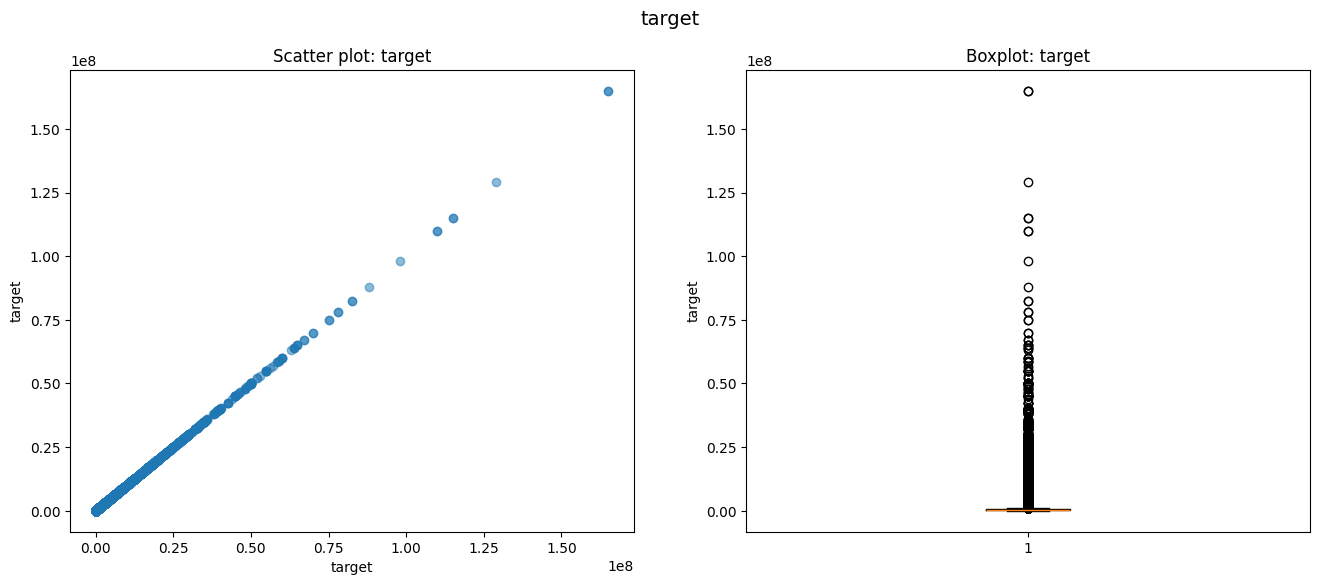

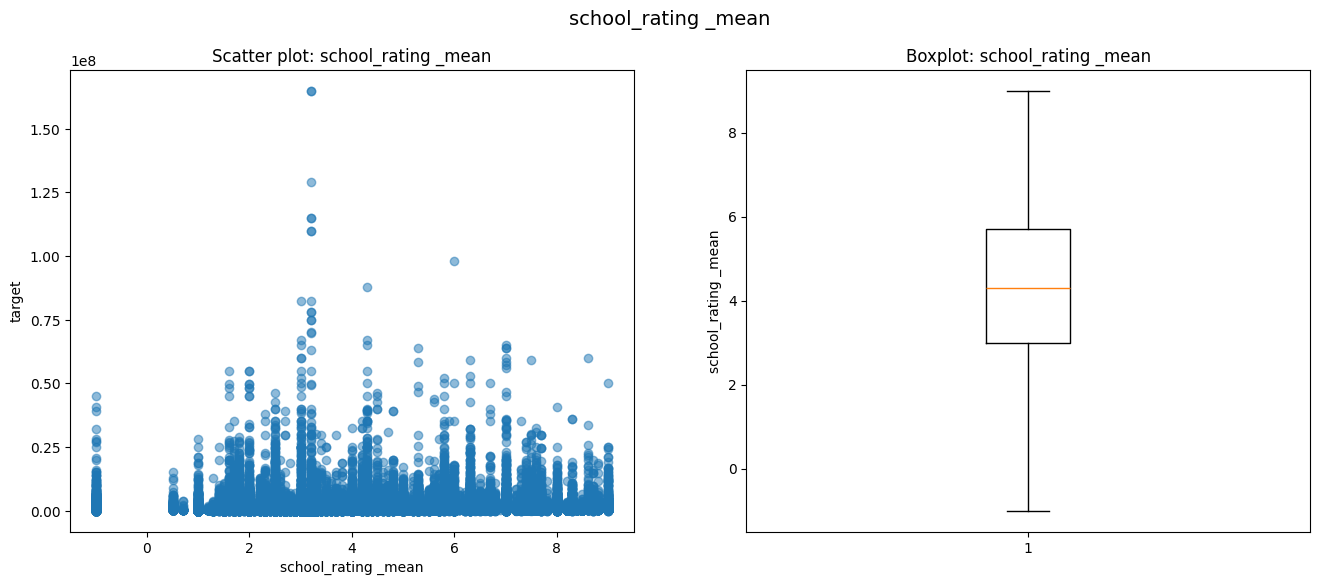

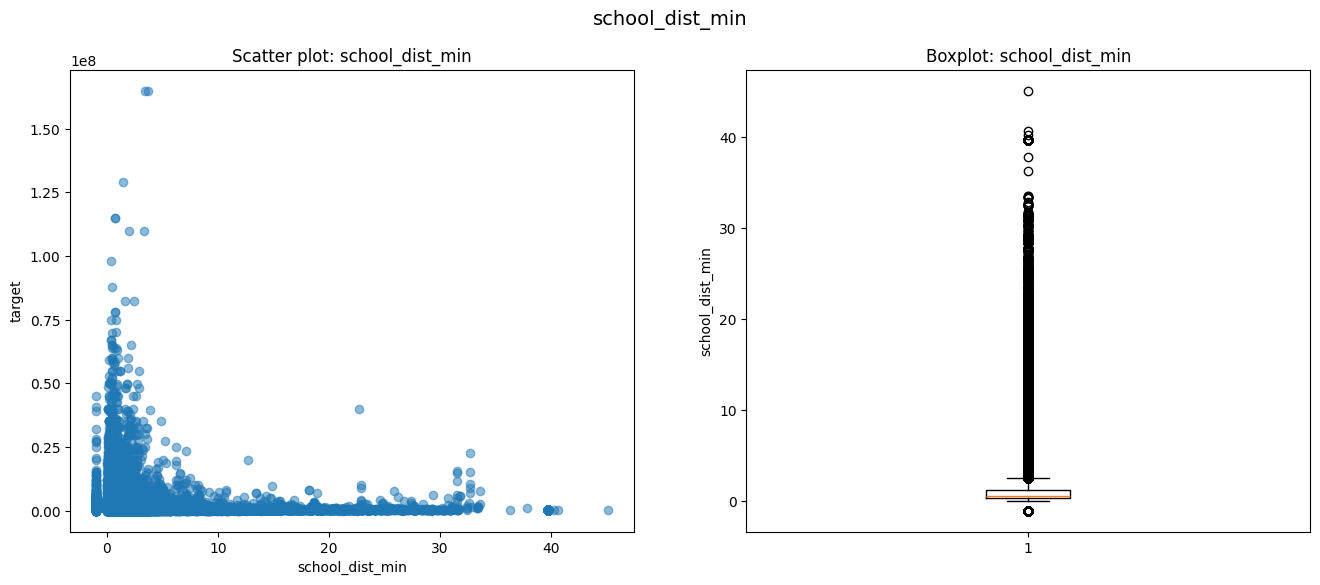

In [ ]:
# Создание графика рассеивания и ящика с усами для каждого признака
for feature in num_features:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle(f'{feature}', fontsize=14)

    # График рассеивания
    ax1.scatter(df[feature], df['target'], alpha=0.5)
    ax1.set_title(f'Scatter plot: {feature}')
    ax1.set_xlabel(feature)
    ax1.set_ylabel('target')

    # Ящик с усами
    ax2.boxplot(df[feature])
    ax2.set_title(f'Boxplot: {feature}')
    ax2.set_ylabel(feature)

    plt.show()

Вывод: от значений с явными выбросами избавилсь, по обнавленным графикам видно присутствие неявных значений, выведем и посчитаем сколько у нас таких значений

In [ ]:
condition3 = ((df['baths'] > 30) | (df['target'] > 750000)) | (df['sqft'] > 200000) |(df['school_dist_min']> 35)
filtered3_df = df[condition3]
# Вывести отфильтрованные строки
print(len(filtered3_df))
display(filtered3_df.head(5))

59199


,status,street,baths,city,sqft,zipcode,state,target,pool_encoded,Type,Year built,Heating_encoded,Cooling_encoded,Parking_encoded,fireplace_encoded,school_rating _mean,school_dist_min
2,For Sale,2005 Westridge Rd,2.0,Los Angeles,3000,90049,CA,2895000,True,single_family_home,1961,True,True,True,True,6.7,1.19
3,For Sale,4311 Livingston Ave,8.0,Dallas,6457,75205,TX,2395000,False,single_family_home,2006,True,True,True,True,5.6,0.10
14,For Sale,930 52nd St,0.0,Brooklyn,0,11219,NY,1650000,False,single_family_home,1905,False,True,False,False,6.3,0.20
16,Active,24 W 126th St,0.0,New York,3325,10027,NY,2650000,False,townhouse,1899,False,False,False,False,2.5,0.10
20,For Sale,61425 Gosney Rd,5.0,Bend,5266,97702,OR,3500000,False,single_family_home,2008,True,True,True,True,6.3,3.70


In [ ]:
# Удаляем Выбросы, соответствующие условию
df.drop(df[condition3].index, inplace=True)

In [ ]:
condition4 = ((df['baths'] < 1) | (df['sqft'] < 1))
filtered4_df = df[condition4]
# Вывести отфильтрованные строки
print(len(filtered4_df))
display(filtered4_df.head(5))

61724


,status,street,baths,city,sqft,zipcode,state,target,pool_encoded,Type,Year built,Heating_encoded,Cooling_encoded,Parking_encoded,fireplace_encoded,school_rating _mean,school_dist_min
4,For Sale,1624 S Newkirk St,0.0,Philadelphia,897,19145,PA,209000,False,townhouse,1920,True,True,False,False,-1.0,-1.00
5,Active,552 Casanova Ct,0.0,Poinciana,1507,34759,FL,181500,False,other,2006,True,True,False,False,2.3,0.80
6,Active,6094 Mingle Dr,0.0,Memphis,0,38115,TN,68000,False,other,1976,False,False,False,False,2.7,0.40
10,Active,4222 False Cypress Ln,0.0,Houston,3130,77068,TX,260000,False,other,2015,True,True,False,False,4.2,0.40
34,For Sale,423 N Church St #13-A,0.0,Charlotte,900,28202,NC,260000,False,condo,1981,False,False,False,False,6.3,0.48


In [ ]:
# Удаляем Выбросы, соответствующие условию
df.drop(df[condition4].index, inplace=True)

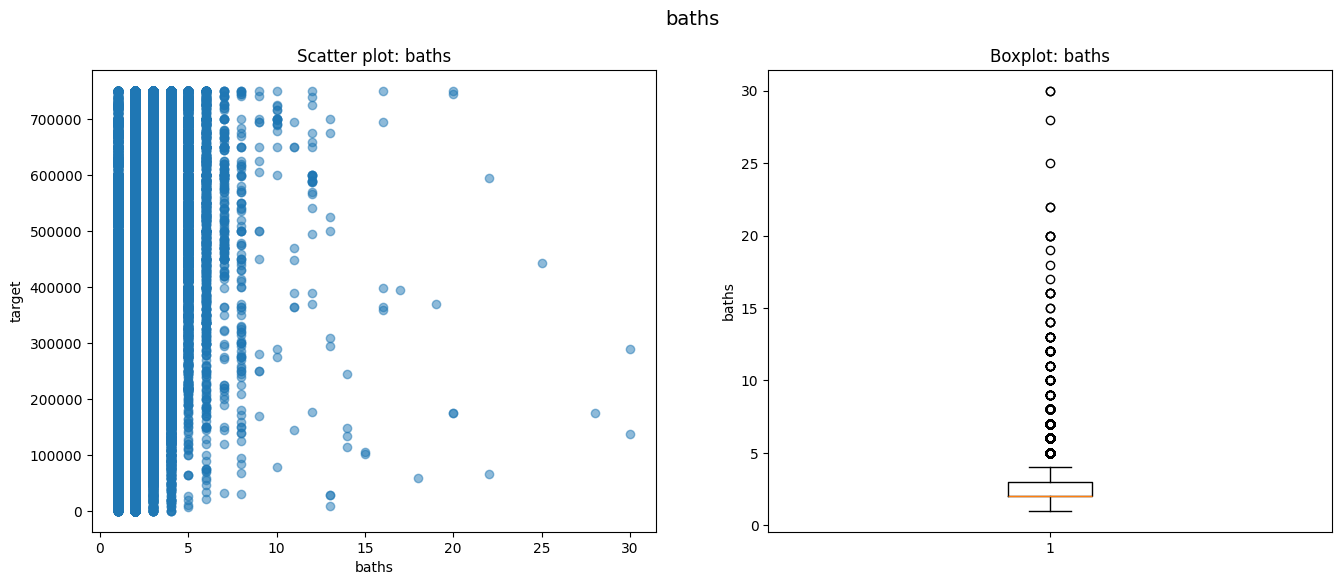

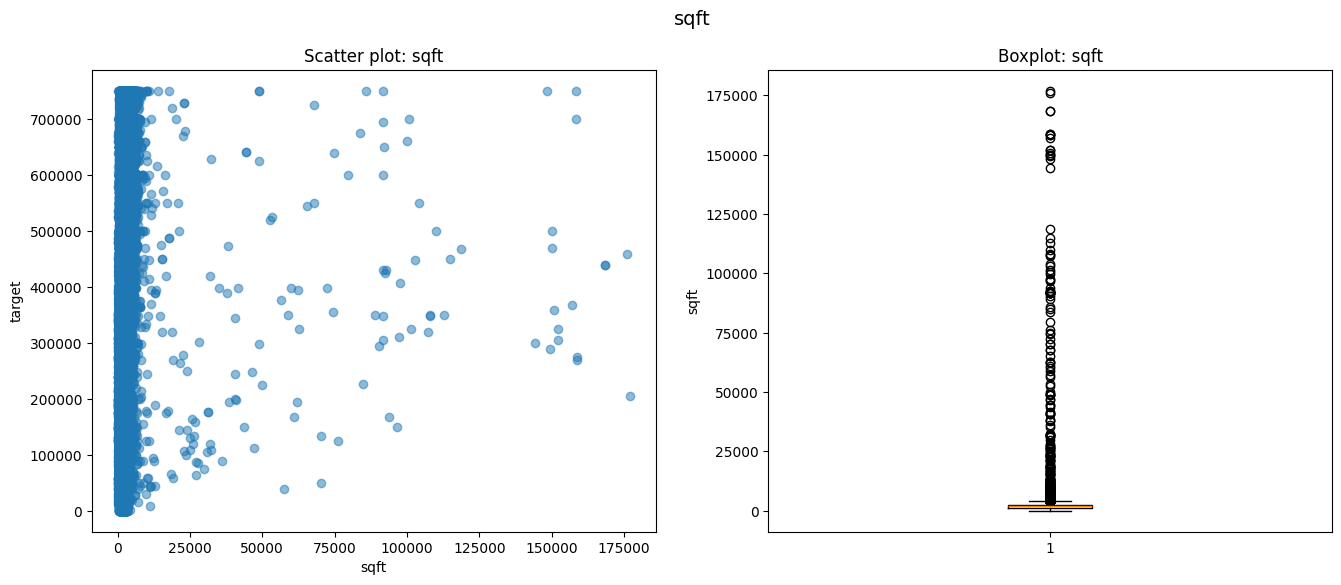

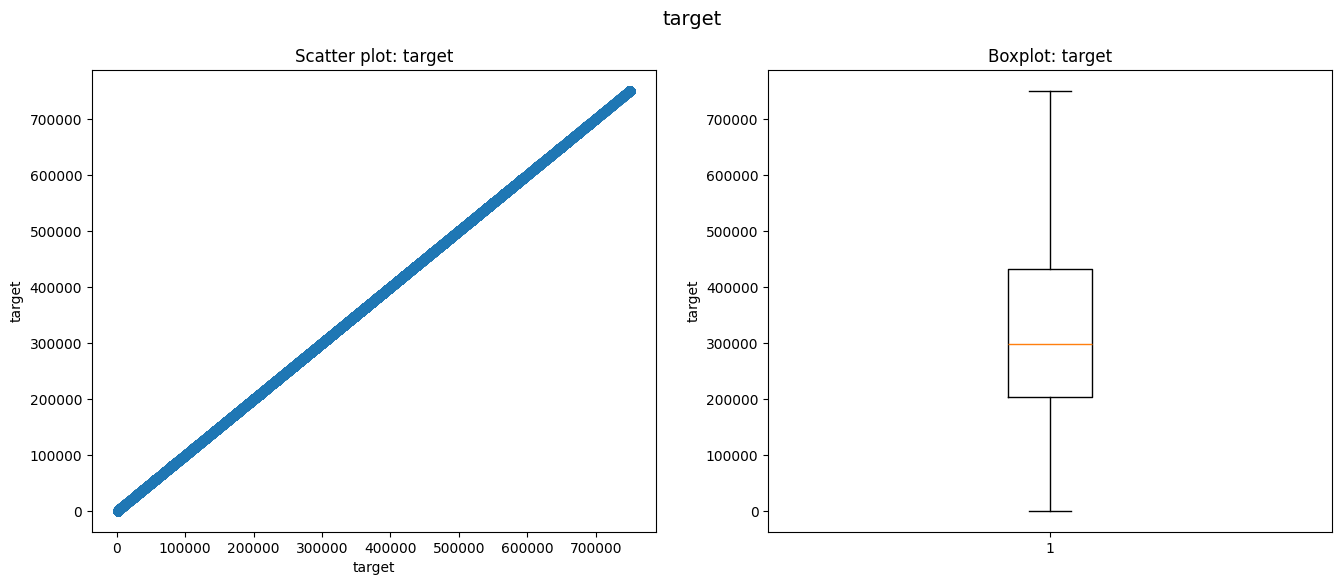

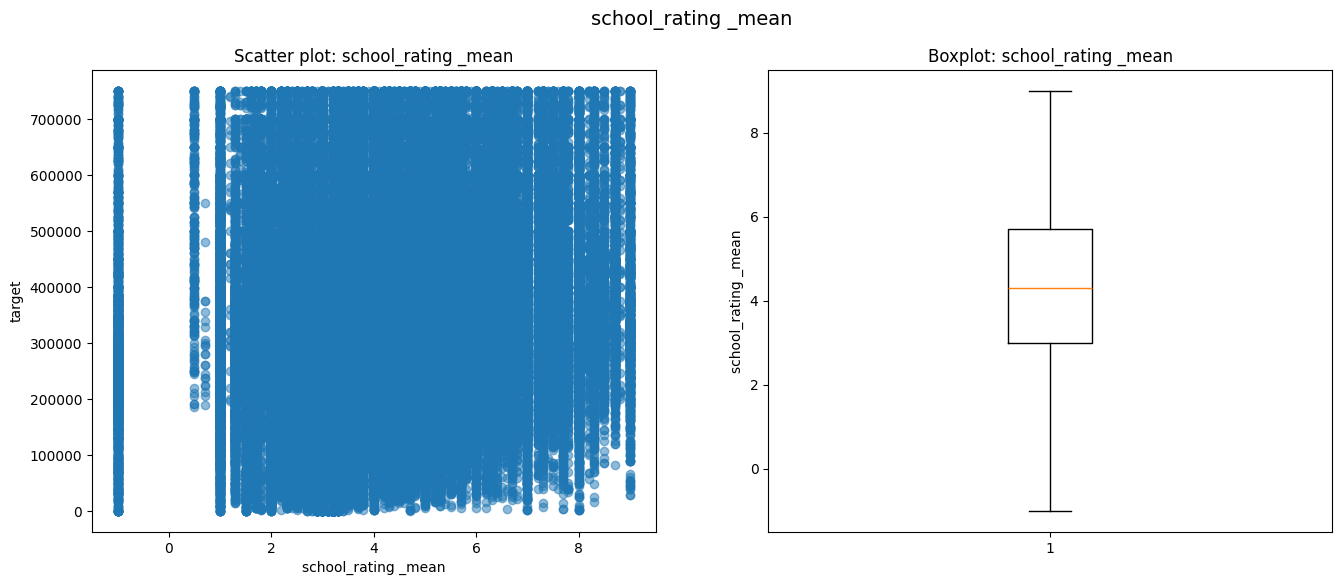

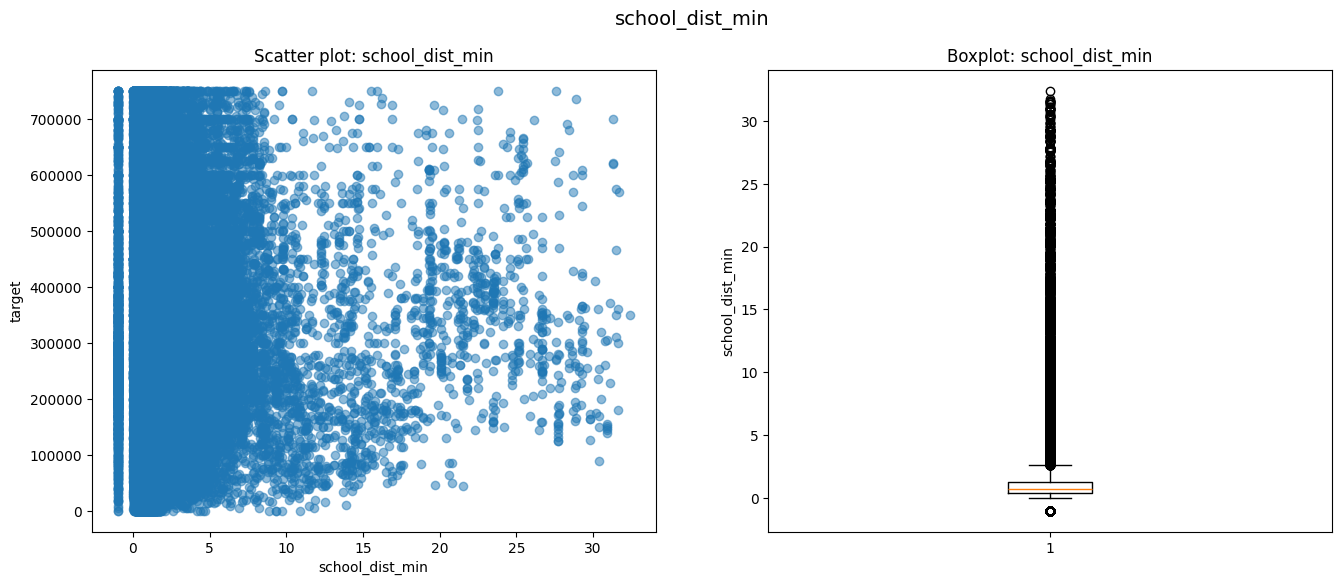

In [ ]:
# Создание графика рассеивания и ящика с усами для каждого признака
for feature in num_features:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle(f'{feature}', fontsize=14)

    # График рассеивания
    ax1.scatter(df[feature], df['target'], alpha=0.5)
    ax1.set_title(f'Scatter plot: {feature}')
    ax1.set_xlabel(feature)
    ax1.set_ylabel('target')

    # Ящик с усами
    ax2.boxplot(df[feature])
    ax2.set_title(f'Boxplot: {feature}')
    ax2.set_ylabel(feature)

    plt.show()

In [ ]:
# удалим признак street
df = df.drop(columns=['street'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 210669 entries, 0 to 331843
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   status               210669 non-null  object 
 1   baths                210669 non-null  float64
 2   city                 210669 non-null  object 
 3   sqft                 210669 non-null  int64  
 4   zipcode              210669 non-null  object 
 5   state                210669 non-null  object 
 6   target               210669 non-null  int64  
 7   pool_encoded         210669 non-null  bool   
 8   Type                 210669 non-null  object 
 9   Year built           210669 non-null  object 
 10  Heating_encoded      210669 non-null  bool   
 11  Cooling_encoded      210669 non-null  bool   
 12  Parking_encoded      210669 non-null  bool   
 13  fireplace_encoded    210669 non-null  bool   
 14  school_rating _mean  210669 non-null  float64
 15  school_dist_min      2

Посморим на распределение признаков

In [ ]:
# Отбираем только нужные признаки из датасета
#data_selected = df[num_features]
# Строим линейную регрессию для выбранных признаков
#sns.pairplot(data_selected, kind='reg')
#Добавляем заголовок
# plt.title('Линейная регрессия для выбранных признаков')
# Сохраняем график в файл с расширением PNG
#plt.savefig('image/plot.png', format='png')
# Отображаем график
#plt.show()
#закоментируем код ибо он очень долго выполняется вывод подкрепляю

FileNotFoundError: [Errno 2] No such file or directory: 'image/plot.png'

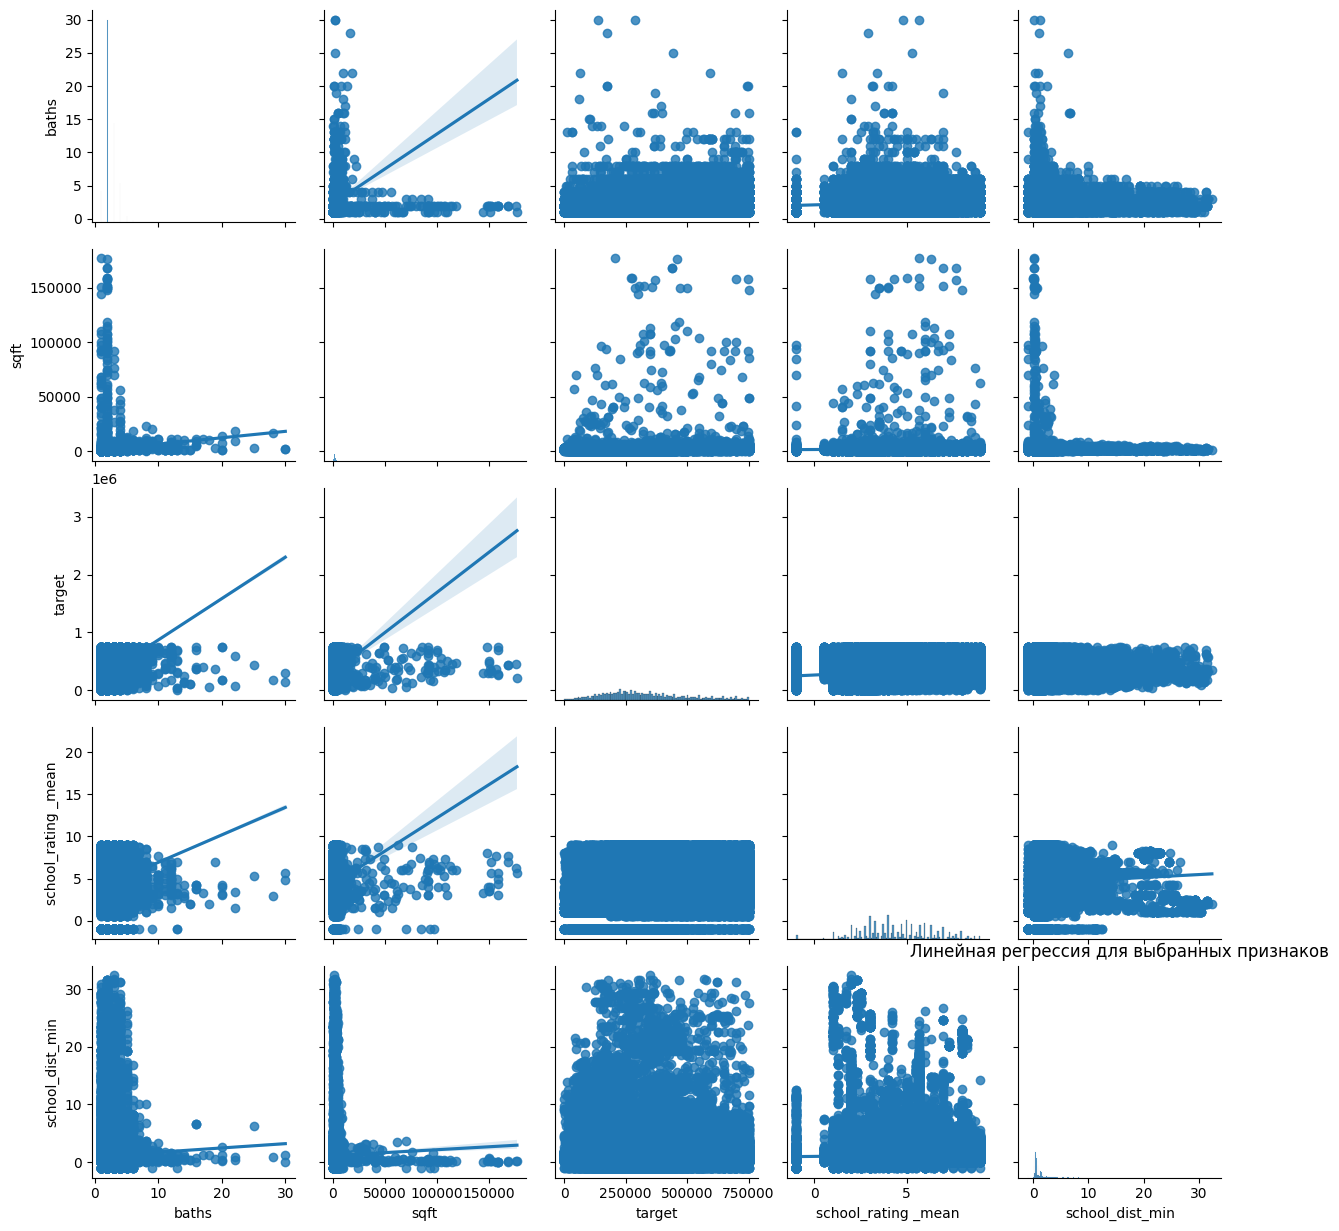

In [ ]:
# Отбираем только нужные признаки из датасета
data_selected = df[num_features]
# Строим линейную регрессию для выбранных признаков
sns.pairplot(data_selected, kind='reg')
#Добавляем заголовок
plt.title('Линейная регрессия для выбранных признаков')
# Сохраняем график в файл с расширением PNG
plt.savefig('image/plot.png', format='png')
# Отображаем график
plt.show()
#закоментируем код ибо он очень долго выполняется вывод подкрепляю

![](image/plot.png)

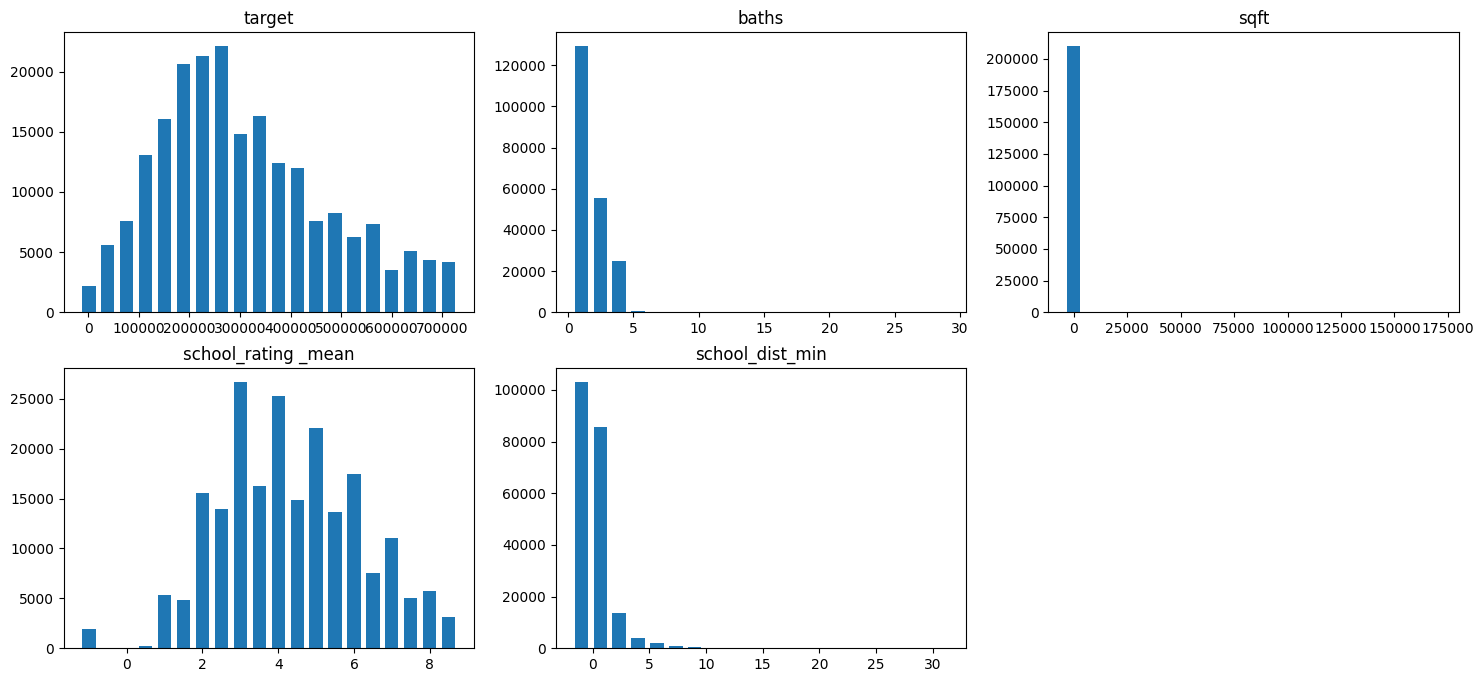

In [ ]:
visualize_distributions({
    'target': df['target'],
    'baths': df['baths'],
    'sqft': df['sqft'],
    'school_rating _mean': df['school_rating _mean'],
    'school_dist_min': df['school_dist_min'],
})

Из графиков видно, что числовые признаки необходимо будет нормализовать и логорифмировать для получения нормального распределения.

Ранг матрицы корреляций: 5
Определитель матрицы корреляций: 0.7559163


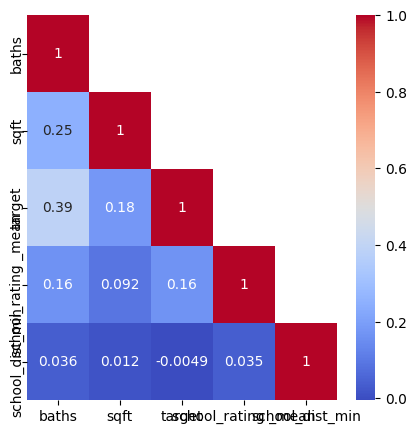

In [ ]:
# Проверяем на мультиколлинеарность и корреляцию числовых признаков между собой и с главным признаком "target":
# Строим матрицу корреляций
corr_matrix = np.corrcoef(df[num_features], rowvar=False)
print('Ранг матрицы корреляций:', np.linalg.matrix_rank(corr_matrix))
print('Определитель матрицы корреляций: {:.7f}'.format(np.linalg.det(corr_matrix)))

# Формируем нижний треугольник матрицы корреляций
corr_matrix_tril = np.tril(corr_matrix)
# Заполняем верхний треугольник значениями NaN
corr_matrix_tril[corr_matrix_tril == 0] = np.nan

# Создаем фигуру с автоматическим масштабированием
plt.figure(figsize=(len(df[num_features].columns), len(df[num_features].columns)))

# Строим тепловую карту
sns.heatmap(corr_matrix_tril, annot=True, cmap='coolwarm', mask=np.isnan(corr_matrix_tril))
# Добавляем подписи столбцов на тепловой карте
plt.xticks(np.arange(len(df[num_features].columns))+0.5, df[num_features].columns, rotation=0, ha='center', fontsize=10)
plt.yticks(np.arange(len(df[num_features].columns))+0.5, df[num_features].columns, ha='center', fontsize=10, va='center', rotation=90)
# Отображаем график
plt.show()

Вывод: Мультиколлинеарность отсутствует

## Анализ номинативных переменных
Посмотрим на распределение стоймости квартир в зависимости от значения номинативных переменных.

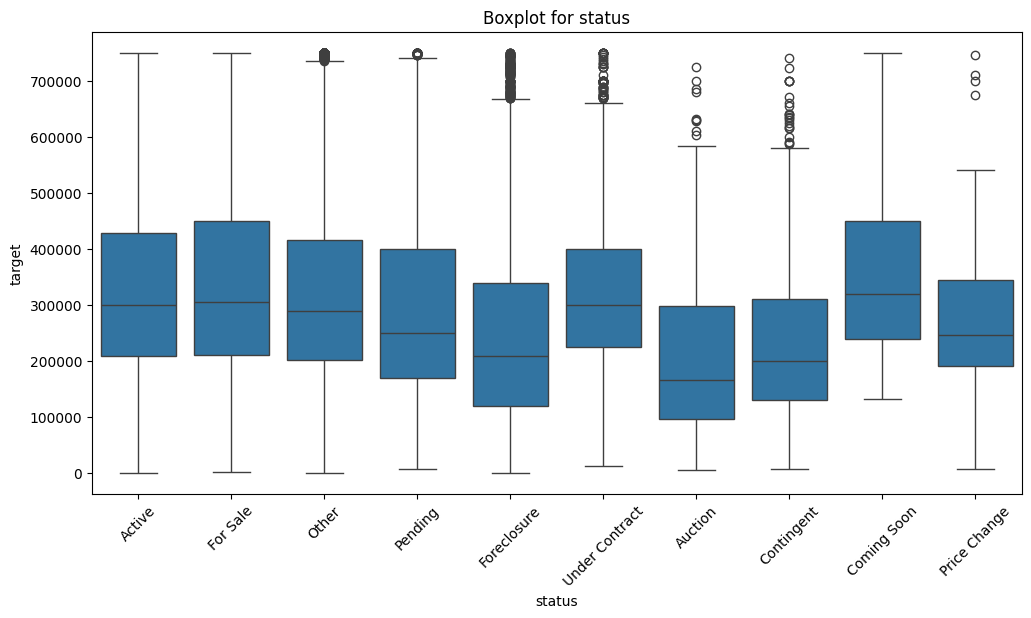

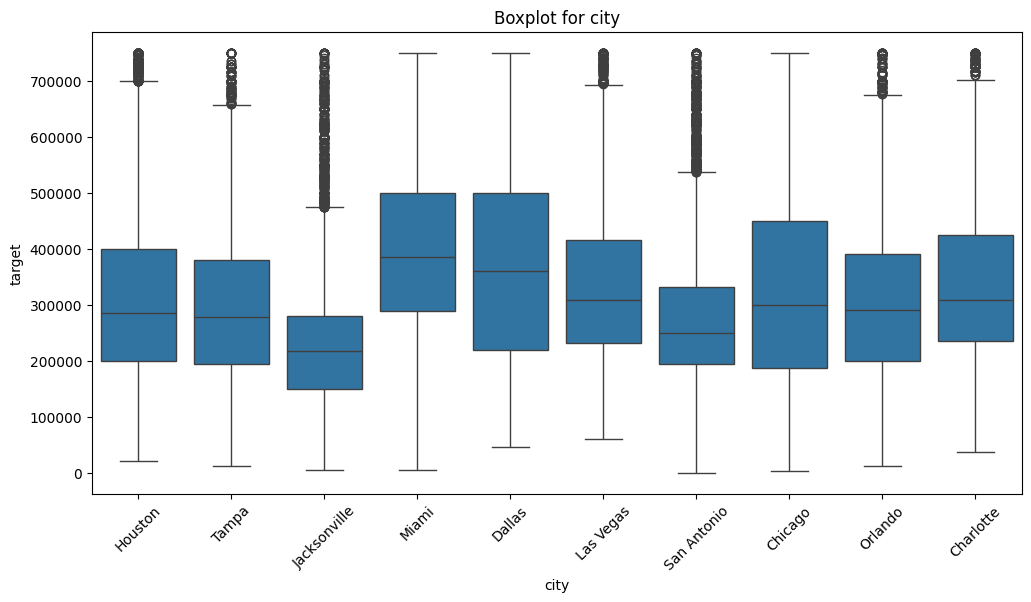

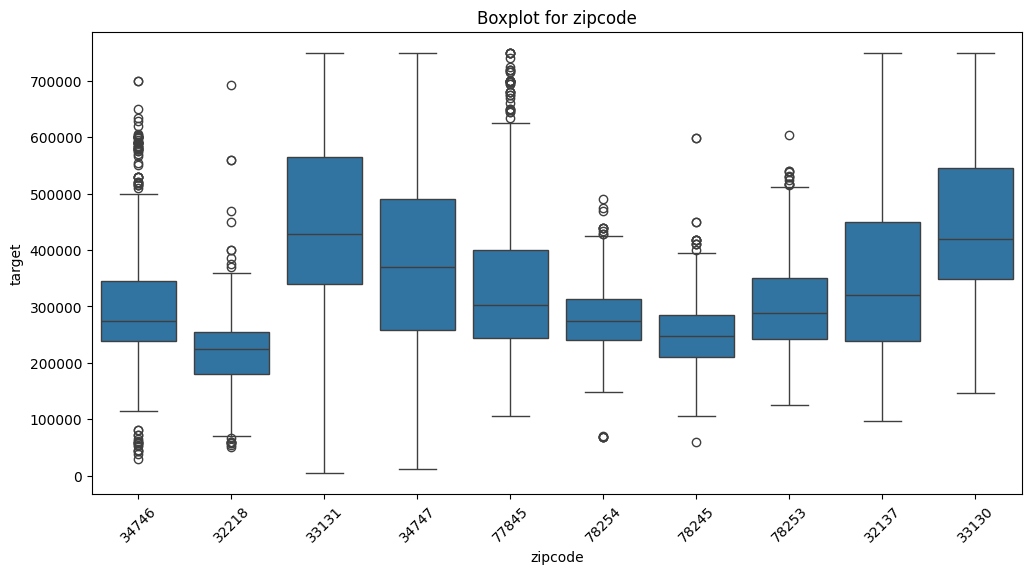

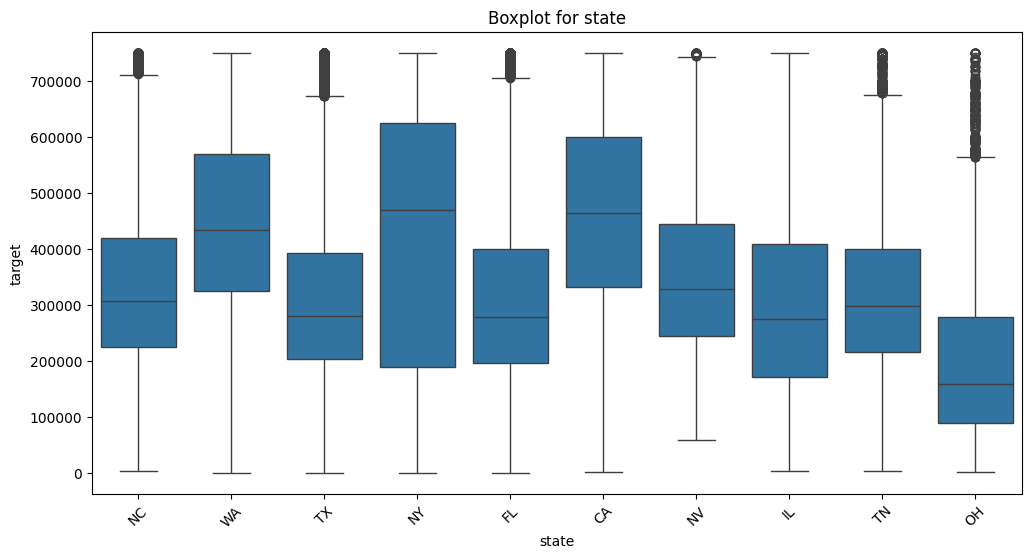

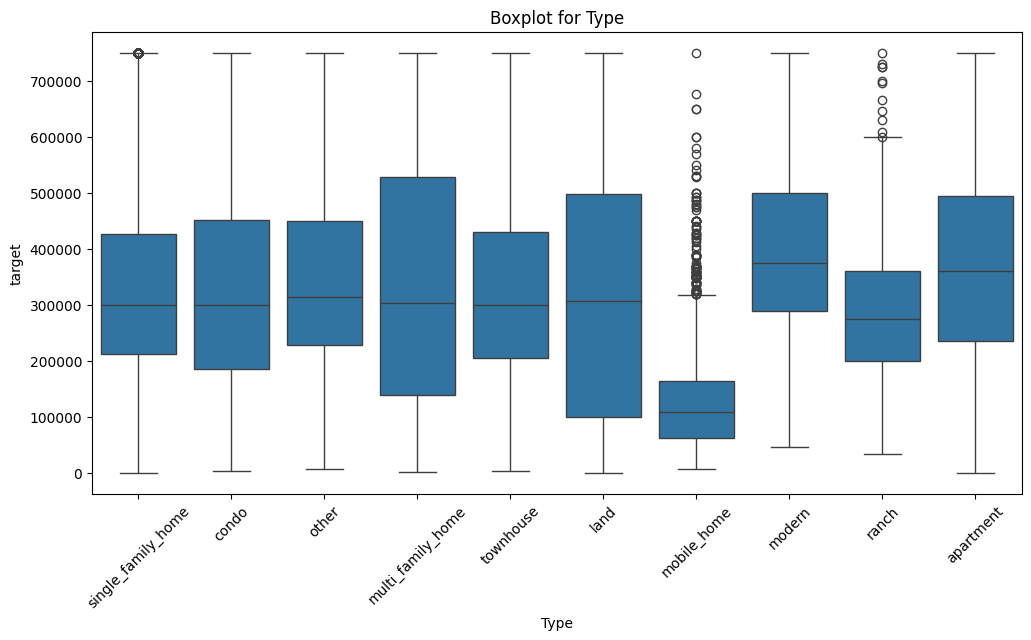

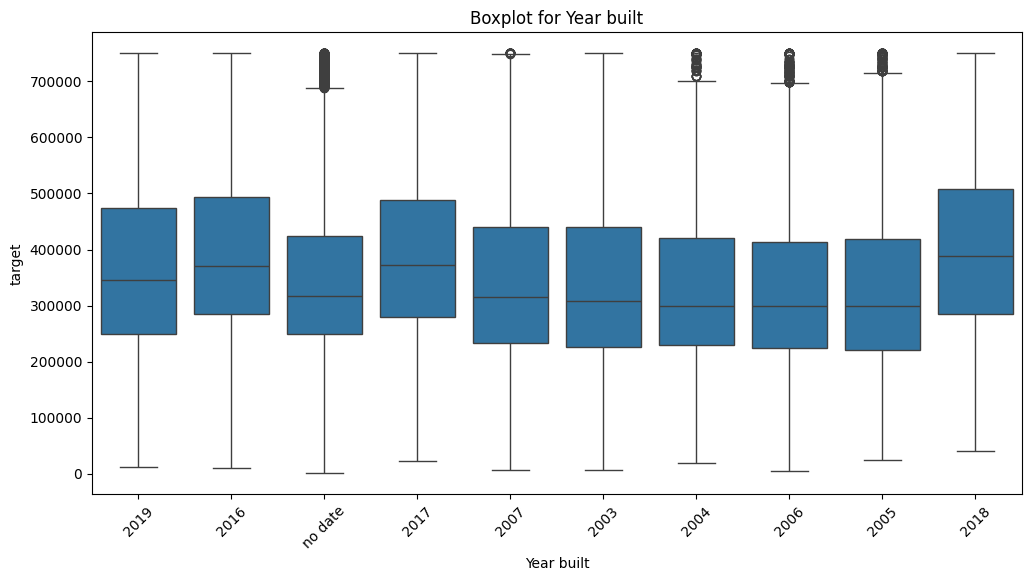

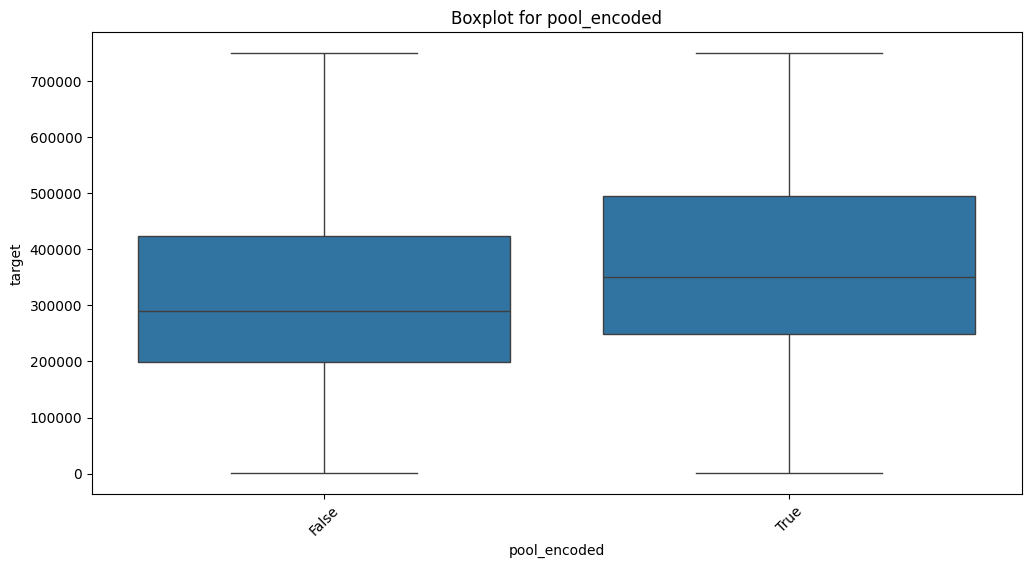

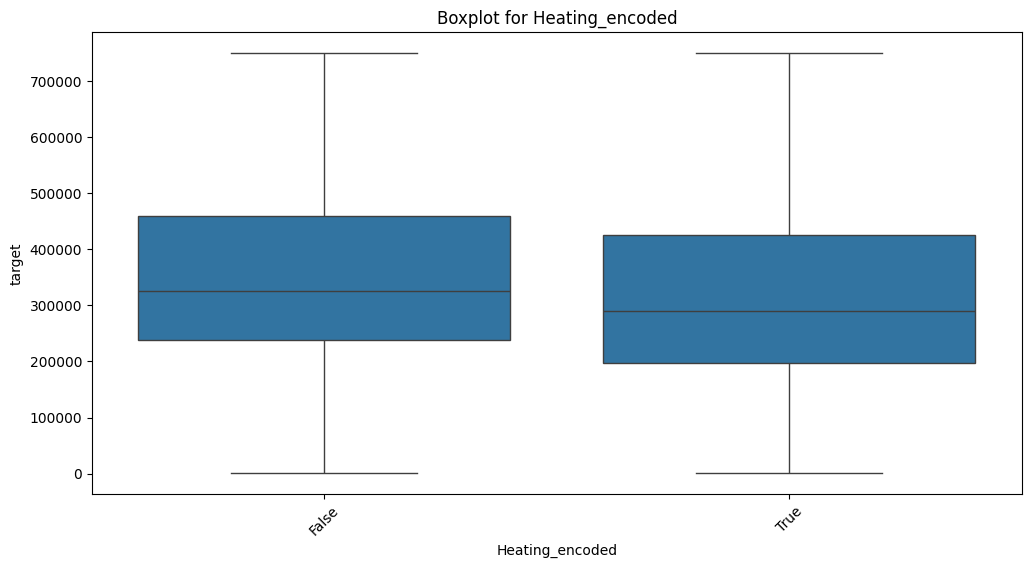

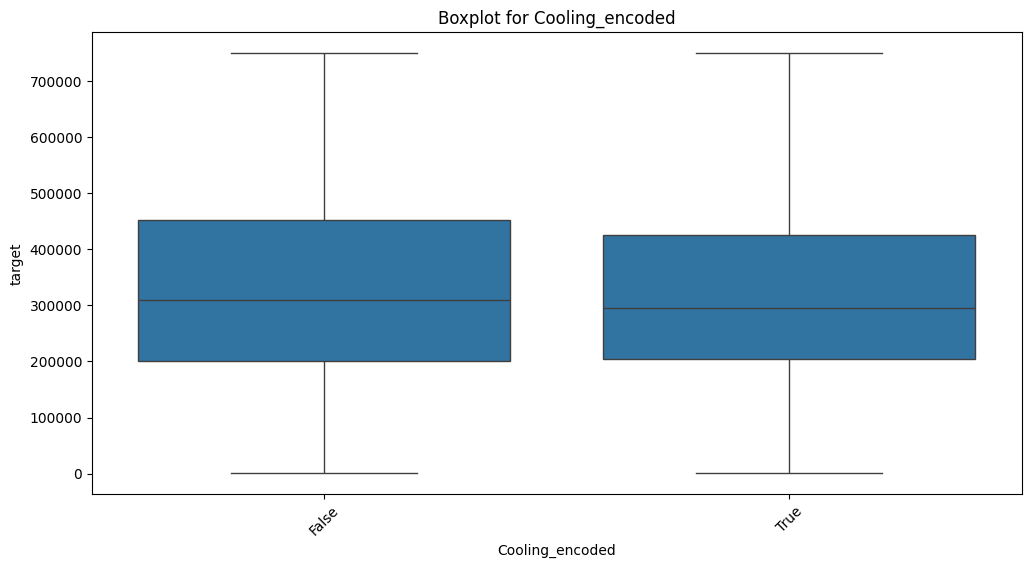

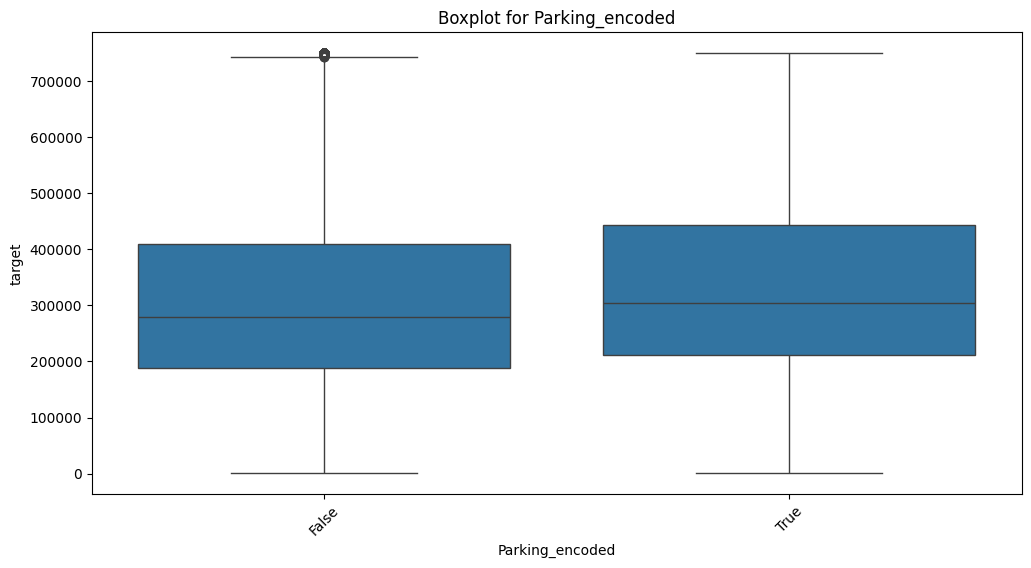

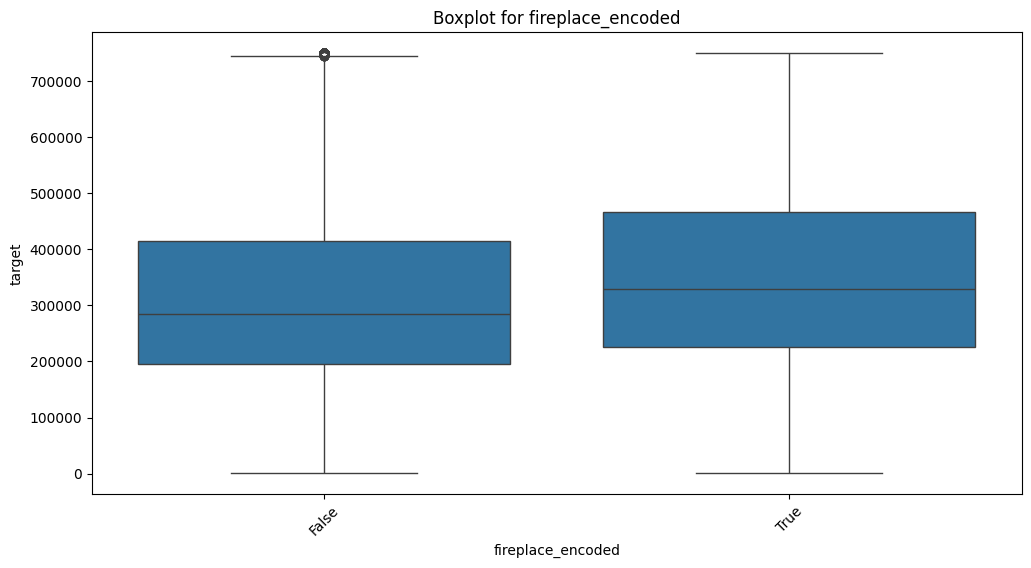

In [ ]:
for col in chain(cat_features, bin_features):
    get_boxplot(col)

Анализируя графики на стоимость могут влиять все параметры.

Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения стоимости недвижимости по различным параметрам неразличимы.

In [ ]:
def get_stat_dif(column):
    cols = df.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'target'],
                        df.loc[df.loc[:, column] == comb[1], 'target']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [ ]:
# Код перестал работать, выдавал*
#for col in chain(cat_features, bin_features):
 #   get_stat_dif(col)

 # *Код перестал работать, выдавал:
* Найдены статистически значимые различия для колонки status
* Найдены статистически значимые различия для колонки city
* Найдены статистически значимые различия для колонки zipcode
* Найдены статистически значимые различия для колонки state
* Найдены статистически значимые различия для колонки Type
* Найдены статистически значимые различия для колонки Year built
* Найдены статистически значимые различия для колонки pool_encoded
* Найдены статистически значимые различия для колонки Heating_encoded
* Найдены статистически значимые различия для колонки Cooling_encoded
* Найдены статистически значимые различия для колонки Parking_encoded
* Найдены статистически значимые различия для колонки fireplace_encoded

In [ ]:
display(df.head())

,status,baths,city,sqft,zipcode,state,target,pool_encoded,Type,Year built,Heating_encoded,Cooling_encoded,Parking_encoded,fireplace_encoded,school_rating _mean,school_dist_min
0,Active,4.0,Southern Pines,2900,28387,NC,418000,False,single_family_home,2019,True,False,False,True,5.2,2.70
1,For Sale,3.0,Spokane Valley,1947,99216,WA,310000,False,single_family_home,2019,False,False,False,False,4.0,1.01
7,Active,2.0,Mason,3588,50401,IA,244900,False,single_family_home,1970,True,True,False,False,3.8,5.60
8,Other,3.0,Houston,1930,77080,TX,311995,False,single_family_home,2019,True,True,True,False,3.0,0.60
9,For Sale,2.0,Flushing,1300,11354,NY,669000,False,condo,1965,False,False,True,False,2.8,0.30


Вывод: все признаки являются значимыми, оставляем их как они есть

# Результаты EDA:



В результате EDA мы проделали следующую работу:
* Избавились от пропусков влияющих на целевую переменную.
* Избавились от выбросов.
* Провели корреляционный анализ числовых признаков.
* Посмотрели на распределение числовых признаков, в результате решили в дальнейшем нормализовать и логорифмировать числовые признаки.
* Провели анализ номинативных переменных.

Сохраним датасет для дальнейшего использования при обучении модели.

In [ ]:
df.to_csv('../content/data_model.csv', index=False)